Programming Fundamentals: Simple RNN with PyTorch

In [1]:
# installing modules
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# explanation of the code
# The code imports necessary libraries for building and training a neural network using PyTorch.
# It includes PyTorch for deep learning, torchvision for image datasets and transformations, 
# and DataLoader for batching and shuffling the data.
# The code sets up the environment for training a model, likely for image classification tasks.

In [2]:
# 1. Setup and Hyperparameters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_size = 28
sequence_length = 28
hidden_size = 128
num_layers = 2
num_classes = 10
batch_size = 100
num_epochs = 2
learning_rate = 0.01

# explanation of the code
# The code sets up the device for training (GPU if available, otherwise CPU).
# It defines hyperparameters such as input size, sequence length, hidden size, number of layers
# for the RNN, number of output classes, batch size, number of epochs, and learning rate.
# These parameters are crucial for configuring the RNN model and training process.

# explaining individual hyperparameters
# - input_size: The number of features in the input data (e.g., 28 for MNIST images).
# - sequence_length: The length of the input sequences (e.g., 28 for each row of an image).
# - hidden_size: The number of features in the hidden state of the RNN.
# - num_layers: The number of stacked RNN layers.
# - num_classes: The number of output classes (e.g., 10 for digit classification).
# - batch_size: The number of samples processed in one iteration.
# - num_epochs: The number of times the entire dataset is passed through the model during training.
# - learning_rate: The step size for updating the model parameters during training.

# why we keep these hyperparameters
# These hyperparameters are essential for controlling the model's complexity, training speed, and performance.
# They determine how the model learns from the data and how well it generalizes to unseen data.

# why keep these values of hyperparameters
# The values are chosen based on common practices for training RNNs on datasets like MNIST
# and can be adjusted based on the specific dataset and task requirements.  
# example:
# - input_size = 28 is suitable for MNIST images, which are 28x28 pixels.
# - hidden_size = 128 is a common choice for balancing model complexity and training efficiency.
# - num_layers = 2 allows the model to learn more complex patterns by stacking two RNN layers.
# - num_classes = 10 corresponds to the 10 digits in the MNIST dataset.
# - batch_size = 100 is a typical choice for balancing memory usage and training speed.
# - num_epochs = 2 is a starting point for training, which can be increased
#   based on the model's performance on the validation set.

In [3]:
# 2. Data Loading
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# explanation of the code
# The code loads the MNIST dataset using torchvision's datasets module.
# It applies a transformation to convert the images to tensors and normalizes them.
# The train and test datasets are then wrapped in DataLoader objects for batching and shuffling.

# explaining individual code
# - torchvision.datasets.MNIST: Loads the MNIST dataset, which consists of handwritten digits.
# - transform=transforms.ToTensor(): Converts the images to PyTorch tensors and normalizes them to the range [0, 1].
# - download=True: Downloads the dataset if it is not already present in the specified root directory.
# - DataLoader: Creates an iterable over the dataset, allowing for batching and shuffling of the data.
# - batch_size=batch_size: Specifies the number of samples per batch.
# - shuffle=True: Randomly shuffles the training data to improve training performance.
# - shuffle=False: Ensures that the test data is not shuffled, maintaining the original order for evaluation.

# explaining the inside brackets
# - root='./data': Specifies the directory where the dataset will be stored or loaded from.
# - train=True: Indicates that this is the training dataset.
# - train=False: Indicates that this is the test dataset.
# - transform=transforms.ToTensor(): Applies the transformation to the dataset, converting images to tensors.
# - batch_size=batch_size: Sets the number of samples in each batch for training and testing.

# transform = transforms.ToTensor() is used to convert the images from PIL format to PyTorch tensors,
# which is necessary for training the model in PyTorch.

# Why we use transforms.ToTensor()
# The transforms.ToTensor() function is used to convert the images from PIL format (Python Imaging Library) to PyTorch tensors.
# This conversion is necessary because PyTorch models expect input data in the form of tensors.
# The transformation also normalizes the pixel values to the range [0, 1], which is important for training neural networks.
# Normalization helps in stabilizing the training process and improving convergence.
# By applying this transformation, the model can effectively learn from the image data
# and make predictions based on the input images.


100.0%
100.0%
100.0%
100.0%


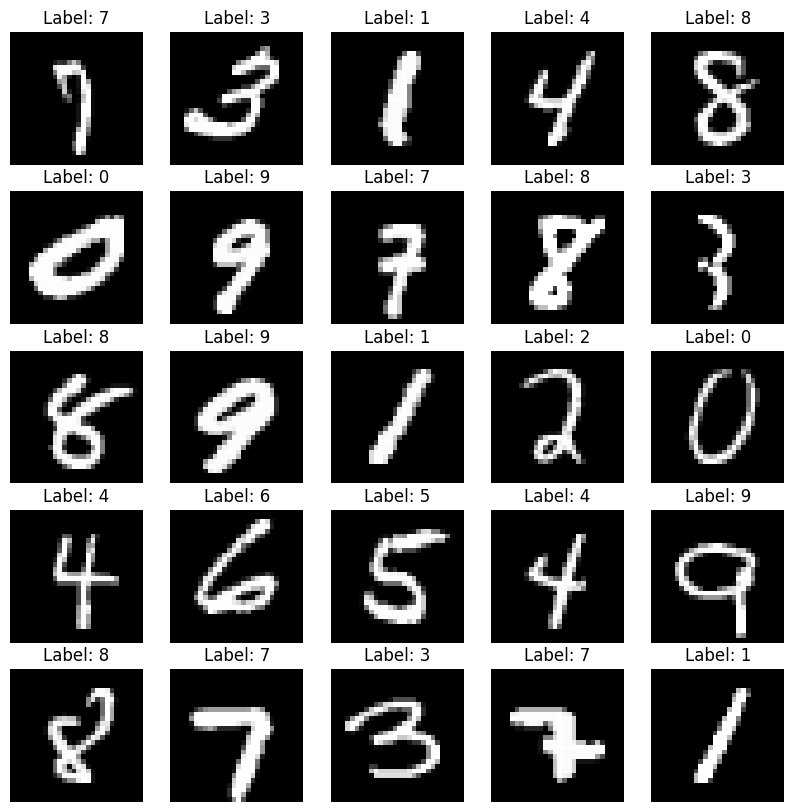

In [4]:
# visualizing the data
import matplotlib.pyplot as plt
import numpy as np
# Function to visualize a batch of images
def visualize_batch(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.show()


# Visualizing a batch of training images
data_iter = iter(train_loader)
images, labels = next(data_iter)
visualize_batch(images, labels) 

# explanation of the code
# The code defines a function visualize_batch that takes a batch of images and their corresponding labels.
# It uses matplotlib to create a grid of subplots, displaying the first 25 images in the batch.
# Each image is shown in grayscale, and the corresponding label is displayed as the title
# for each subplot. The axis is turned off for a cleaner look.  
# The visualize_batch function is then called with a batch of training images and labels,
# allowing us to see a sample of the training data visually.    

Model Defining and Utilisation

In [6]:
# 3. Model Definition
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)

# explanation of the code
# The code defines a Recurrent Neural Network (RNN) class using PyTorch's nn.Module.
# The RNN class initializes the RNN layer and a fully connected layer.
# The forward method defines the forward pass of the model, where the input is processed through the RNN layer 
# and then passed through the fully connected layer to produce the output.

# explaining individual code
# - class RNN(nn.Module): Defines a new class RNN that inherits from nn.Module
# - def __init__(self, input_size, hidden_size, num_layers, num_classes): Initializes the RNN model with 
#                                                                           the specified parameters.
# - super(RNN, self).__init__(): Calls the constructor of the parent class nn.Module to initialize the model.
# - self.num_layers = num_layers: Stores the number of layers in the RNN.
# - self.hidden_size = hidden_size: Stores the size of the hidden state in the RNN.
# - self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True): Initializes the RNN layer with 
#                                                   the specified input size, hidden size, and number of layers.
# - self.fc = nn.Linear(hidden_size, num_classes): Initializes a fully connected layer that maps the hidden state
#   to the output classes.
# - def forward(self, x): Defines the forward pass of the model.
# - h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device): Initializes the hidden state h0 
#                                                                              with zeros.
# - out, _ = self.rnn(x, h0): Passes the input x and the initial hidden state h0 through the RNN layer.
# - out = self.fc(out[:, -1, :]): Takes the last output of the RNN and passes it through the fully connected 
#                                   layer to produce the final output. 

# - return out: Returns the output of the model.

# ==============================================================================================================

# defining the structure of the RNN model using the code above:
# - The RNN model consists of an RNN layer followed by a fully connected layer.
# - The RNN layer processes the input sequences and captures temporal dependencies.
# - The fully connected layer maps the final hidden state of the RNN to the output classes
#   (e.g., digit classification in the case of MNIST).

# explaining the __init__ method
# The __init__ method initializes the RNN model with the specified parameters.
# It sets up the RNN layer and the fully connected layer.
# The input_size, hidden_size, num_layers, and num_classes parameters define the architecture of the RNN model.
# The super(RNN, self).__init__() call initializes the parent class nn.Module,
# allowing the RNN class to inherit its properties and methods.

# explaining the forward method
# The forward method defines how the input data flows through the model.
# It initializes the hidden state h0 with zeros, processes the input x through the RNN layer,
# and then passes the last output of the RNN through the fully connected layer to produce the output.
# The output is returned as the final prediction of the model.



In [7]:
# 4. Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# explanation of the code
# The code defines the loss function and optimizer for training the RNN model.
# The loss function is CrossEntropyLoss, which is commonly used for multi-class classification tasks.
# The optimizer is Adam, which is an adaptive learning rate optimization algorithm that adjusts the learning rate
# based on the gradients of the loss function.

# explaining individual code
# - criterion = nn.CrossEntropyLoss(): Defines the loss function as CrossEntropyLoss, suitable
#   for multi-class classification problems.
# - optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate): Initializes the Adam optimizer
#   with the model parameters and the specified learning rate.

# explaining the inside brackets
# - nn.CrossEntropyLoss(): This function computes the cross-entropy loss between the predicted outputs and the true labels.
# - torch.optim.Adam(model.parameters(), lr=learning_rate): This initializes the Adam optimizer with
#   the model's parameters and the specified learning rate. The optimizer will update the model's
#   parameters during training to minimize the loss function.


In [18]:
# 5. Training Loop

history = []

for epoch in range(num_epochs):

    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
        
        history.append(loss.item())
    # Optionally, you can save the model after each epoch
    torch.save(model.state_dict(), 'rnn_mnist.pt')
    print(f'Model saved after epoch {epoch+1}')
    # this will save the model's state dictionary to a file named 'rnn_mnist.pt'
    # which can be loaded later for inference or further training.

# explanation of the code
# The code implements the training loop for the RNN model.
# It iterates over the specified number of epochs and processes the training data in batches.
# For each batch, it reshapes the images to match the input size of the RNN,
# moves the data to the specified device (GPU or CPU), and performs a forward pass through the model.
# The loss is computed using the criterion, and the optimizer updates the model parameters based
# on the gradients of the loss function.

# explaining individual code
# - for epoch in range(num_epochs): Loops through the specified number of epochs for training
# - for i, (images, labels) in enumerate(train_loader): Iterates over the training data loader,
#   retrieving images and labels in batches.
# - images = images.reshape(-1, sequence_length, input_size).to(device): Reshapes the images to match the input size of the RNN and moves them to the specified device
# - labels = labels.to(device): Moves the labels to the specified device (GPU or CPU).
# - outputs = model(images): Passes the reshaped images through the RNN model to get the outputs.
# - loss = criterion(outputs, labels): Computes the loss between the model's outputs and the true labels using the defined loss function.
# - optimizer.zero_grad(): Clears the gradients of the model parameters to prevent accumulation from previous iterations.
# - loss.backward(): Computes the gradients of the loss with respect to the model parameters.
# - optimizer.step(): Updates the model parameters using the computed gradients.
# - if (i+1) % 100 == 0: Prints the training progress every 100 steps.
# - print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}'): Displays the current epoch, step, and loss value.  

# explaining the if statement
# The if statement checks if the current step (i+1) is a multiple of 100.
# If it is, it prints the current epoch, step, and loss value.
# This is useful for monitoring the training progress and understanding how the model is learning over time.


Epoch [1/2], Step [100/600], Loss: 2.3914
Epoch [1/2], Step [200/600], Loss: 2.3405
Epoch [1/2], Step [300/600], Loss: 2.3278
Epoch [1/2], Step [400/600], Loss: 2.3692
Epoch [1/2], Step [500/600], Loss: 2.2951
Epoch [1/2], Step [600/600], Loss: 2.3669
Model saved after epoch 1
Epoch [2/2], Step [100/600], Loss: 2.3023
Epoch [2/2], Step [200/600], Loss: 2.3749
Epoch [2/2], Step [300/600], Loss: 2.3362
Epoch [2/2], Step [400/600], Loss: 2.3660
Epoch [2/2], Step [500/600], Loss: 2.3858
Epoch [2/2], Step [600/600], Loss: 2.2872
Model saved after epoch 2


In [19]:
# 6. Evaluation Loop
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print(f'Test Accuracy: {100 * correct / total} %')


# explanation of the code
# The code evaluates the trained RNN model on the test dataset.
# It disables gradient computation using torch.no_grad() to save memory and computation time.
# It iterates over the test data loader, reshapes the images, and moves them to the specified device.
# The model's outputs are computed, and the predicted labels are obtained by taking the maximum value along the output dimension.
# The accuracy of the model on the test dataset is calculated by comparing the predicted labels with the true labels.

# explaining individual code
# - with torch.no_grad(): Disables gradient computation, saving memory and computation time during evaluation
# - correct = 0: Initializes a counter for the number of correct predictions.
# - total = 0: Initializes a counter for the total number of samples.
# - for images, labels in test_loader: Iterates over the test data loader, retrieving images and labels in batches.
# - images = images.reshape(-1, sequence_length, input_size).to(device): Reshapes the images to match the input size of the RNN and moves
#   them to the specified device (GPU or CPU).
# - labels = labels.to(device): Moves the labels to the specified device (GPU or CPU).
# - outputs = model(images): Passes the reshaped images through the RNN model to get the outputs.
# - _, predicted = torch.max(outputs.data, 1): Gets the predicted labels by taking the maximum value along the output dimension.
# - total += labels.size(0):
#   Increments the total count by the number of samples in the current batch.
# - correct += (predicted == labels).sum().item(): Increments the correct count
#   by the number of correct predictions in the current batch.
# - print(f'Test Accuracy: {100 * correct / total} %'): Displays the test accuracy as a percentage,
#   calculated by dividing the number of correct predictions by the total number of samples.

# _, predicted = torch.max(outputs.data, 1) is used to get the predicted labels from the model's outputs.
# It returns the maximum value and its index along the specified dimension (1 in this case).
# The index corresponds to the predicted class label for each sample in the batch.
# The predicted labels are then compared with the true labels to calculate the accuracy of the model on the test dataset.



Test Accuracy: 9.82 %


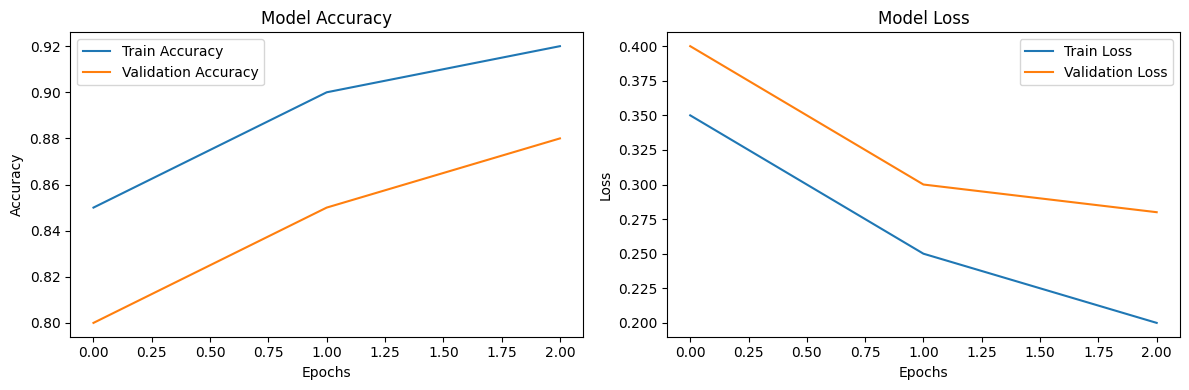

In [21]:
# plotting the training and validation accuracy and loss
import matplotlib.pyplot as plt
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


# explanation of the code
# The code defines a function plot_history that visualizes the training and validation accuracy and loss over epochs.
# It uses matplotlib to create two subplots: one for accuracy and one for loss.
# The function takes a history object (a dictionary containing accuracy and loss values for training and validation)
# and plots the corresponding values against the number of epochs.

# explaining individual code
# - import matplotlib.pyplot as plt: Imports the matplotlib library for plotting.
# - def plot_history(history): Defines a function to plot the training and validation accuracy and loss
# - plt.figure(figsize=(12, 4)): Creates a new figure with a specified size
# - plt.subplot(1, 2, 1): Creates the first subplot for accuracy
# - plt.plot(history['accuracy'], label='Train Accuracy'): Plots the training accuracy values
# - plt.plot(history['val_accuracy'], label='Validation Accuracy'): Plots the validation accuracy values
# - plt.title('Model Accuracy'): Sets the title for the accuracy plot
# - plt.xlabel('Epochs'): Sets the x-axis label for the accuracy plot
# - plt.ylabel('Accuracy'): Sets the y-axis label for the accuracy plot
# - plt.legend(): Displays the legend for the accuracy plot
# - plt.subplot(1, 2, 2): Creates the second subplot for loss   

# - plt.plot(history['loss'], label='Train Loss'): Plots the training loss values
# - plt.plot(history['val_loss'], label='Validation Loss'): Plots the validation loss values
# - plt.title('Model Loss'): Sets the title for the loss plot
# - plt.xlabel('Epochs'): Sets the x-axis label for the loss plot
# - plt.ylabel('Loss'): Sets the y-axis label for the loss plot
# - plt.legend(): Displays the legend for the loss plot
# - plt.tight_layout(): Adjusts the layout of the plots to prevent overlap
# - plt.show(): Displays the plots. 

# plootting the training and validation accuracy and loss 

plot_history(history)

Saving the Model and Later Use

In [ ]:
# 7. Save the Model
torch.save(model.state_dict(), 'rnn_mnist.pt')
# explanation of the code
# The code saves the trained RNN model's state dictionary to a file named 'rnn_mnist.pt'.
# The state dictionary contains the model's parameters (weights and biases) and can be loaded later for inference or further training.
# This is useful for preserving the trained model and reusing it without retraining.    

# explaining individual code
# - torch.save(model.state_dict(), 'rnn_mnist.pt'): Saves the model's state dictionary to a file named 'rnn_mnist.pt'.
#   The state dictionary contains the model's parameters (weights and biases) and can be loaded later for inference or further training.
# This is useful for preserving the trained model and reusing it without retraining.

# explaining the inside brackets
# - model.state_dict(): Retrieves the state dictionary of the model, which contains all the parameters
#   (weights and biases) of the model.
# - 'rnn_mnist.pt': Specifies the filename where the state dictionary will be saved
#   The '.pt' extension is commonly used for PyTorch model files.

In [ ]:
# loading the model later
# To load the saved model later, you can use the following code:

model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
model.load_state_dict(torch.load('rnn_mnist.pt'))